In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [3]:
df = pd.read_csv('./Data/Telco-Customer-Churn.csv')

## Basic data check

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
#Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='Churn', ylabel='count'>

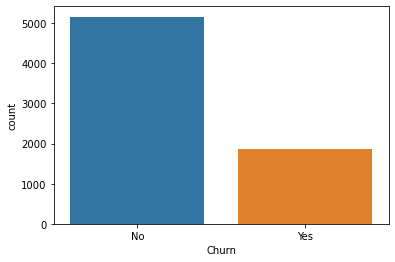

In [8]:
#Check the distribution of the targets
sns.countplot(data=df,x='Churn')

Text(0.5, 1.0, 'Churn w.r.t Total Charges')

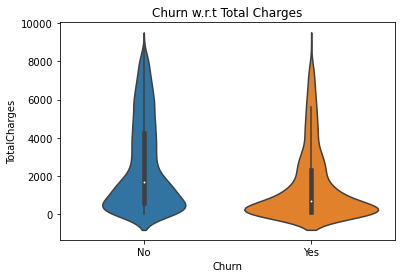

In [14]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')
plt.title('Churn w.r.t Total Charges')

Harder to see why people left from total charges, makes sense since people who stayed paid more eventually

Text(0.5, 1.0, 'Churn w.r.t Total Charges in a boxplot')

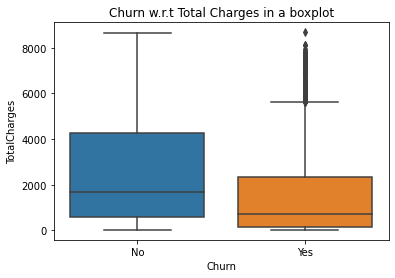

In [18]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')
plt.title('Churn w.r.t Total Charges in a boxplot')

Text(0.5, 1.0, 'Churn w.r.t Montly Charges')

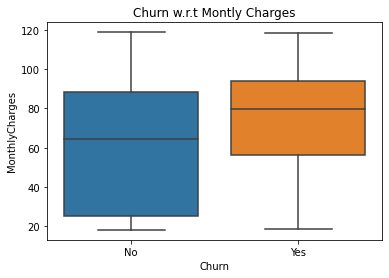

In [17]:
sns.boxplot(data=df,x='Churn',y='MonthlyCharges')
plt.title('Churn w.r.t Montly Charges')

This makes more sense. People who left were charged higher monthly

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Text(0.5, 1.0, 'Churn based on total chages and Contracts')

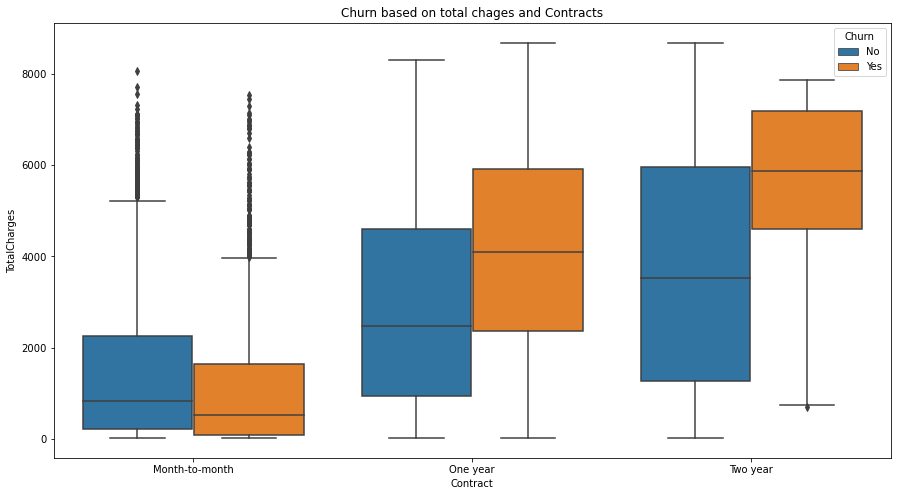

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.title('Churn based on total chages and Contracts')

Text(0.5, 1.0, 'Churn based on monthly chages and Contracts')

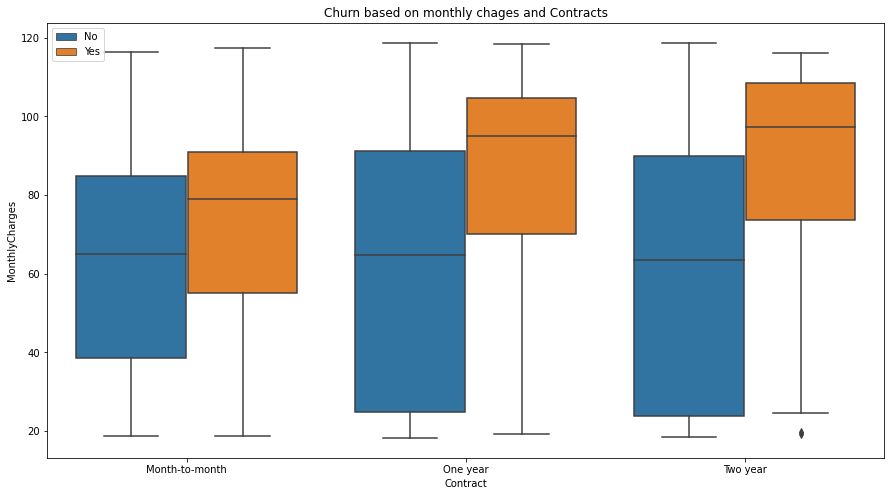

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Contract',y='MonthlyCharges',hue='Churn')
plt.legend(loc='upper left')
plt.title('Churn based on monthly chages and Contracts')

People who left were all paying more no matter the contract type

In [25]:
#Check values in Senior citizen column
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Churn amongst seniors')

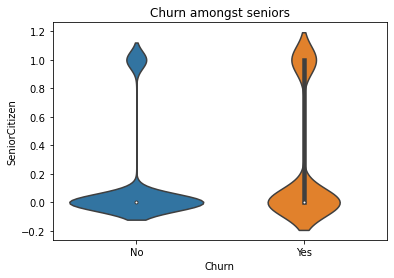

In [26]:
sns.violinplot(data=df,x='Churn',y='SeniorCitizen')
plt.title('Churn amongst seniors')

Looks like we were losing people who were seniors as well. Pretty sure they are not pro active in searching for the best deals

In [27]:
pd.set_option('display.max_columns',None)
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


## Check the correlations between the columns including the labeled ones after getting dummies for them

In [30]:
df_dummies = pd.get_dummies(df.drop('customerID',axis=1))
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [31]:
df_dummies.corr()['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
StreamingMovies_No internet service       -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMetho

(-0.5, 0.5)

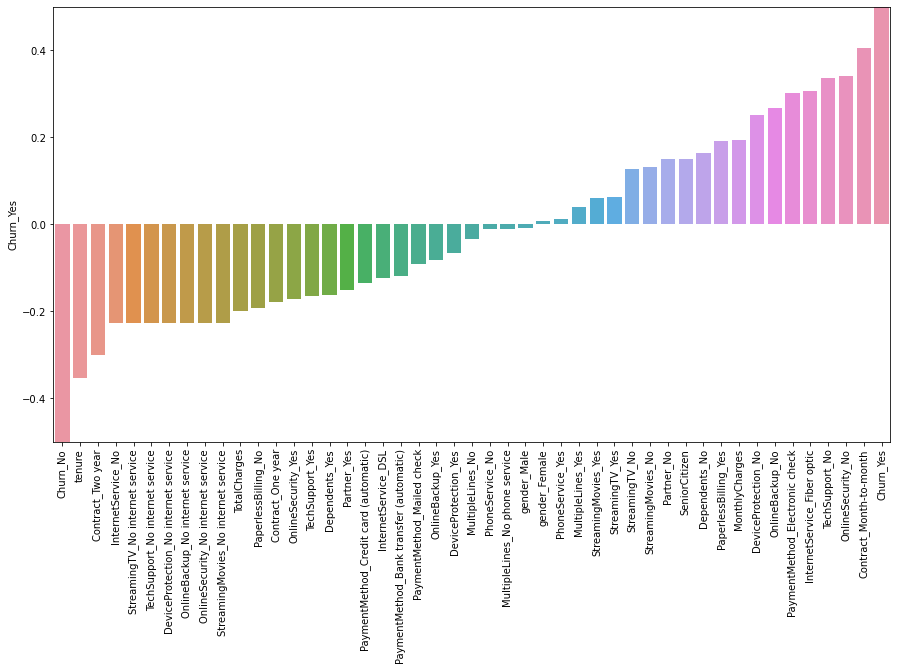

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_dummies.corr()['Churn_Yes'].sort_values().index,y=df_dummies.corr()['Churn_Yes'].sort_values())
plt.xticks(rotation=90);
plt.ylim((-0.5,0.5))

## Gives us a rough idea of which features tend to predict churn

(0.0, 72.0)

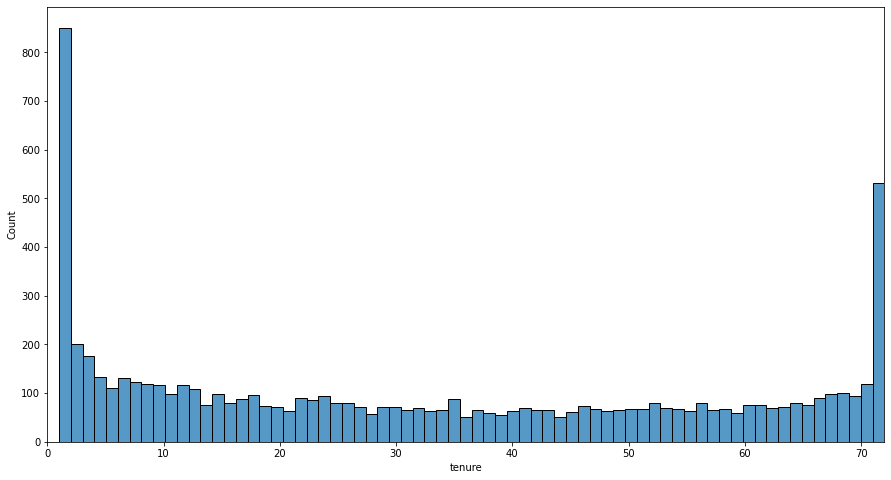

In [33]:
# Check the distribution of the tenure column
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='tenure',bins=70)
plt.xlim((0,72))

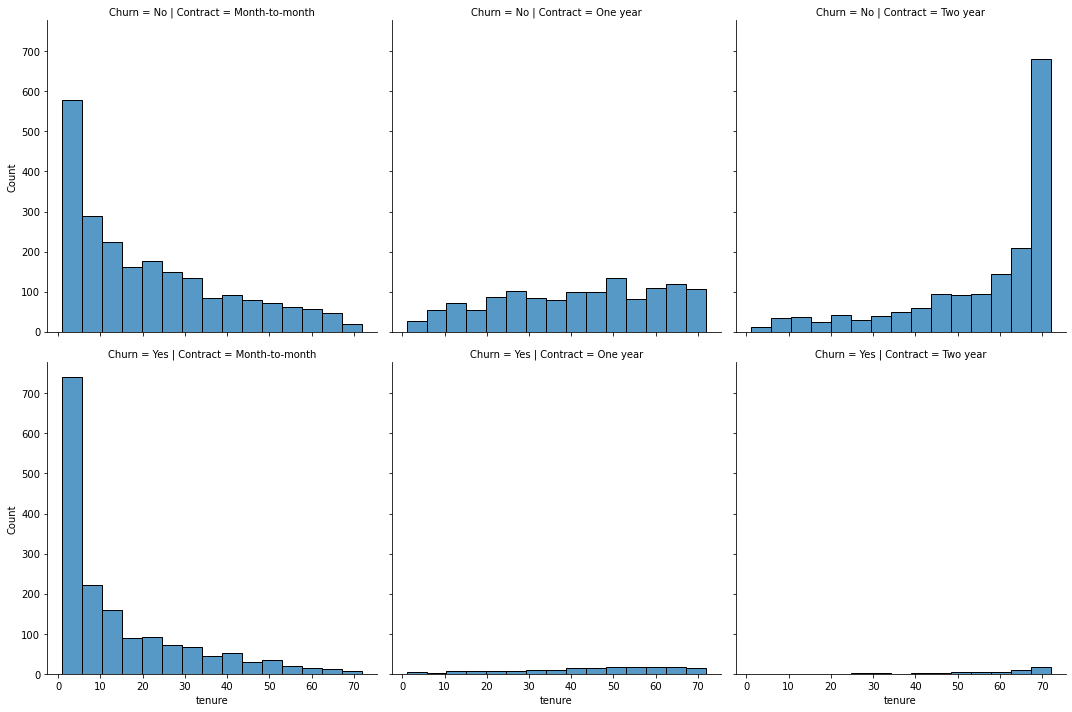

In [34]:
sns.displot(data=df,x='tenure',row='Churn',col='Contract')

Lot of people are leaving when on a month to month contract. Could try and convert them to other types and retain more

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

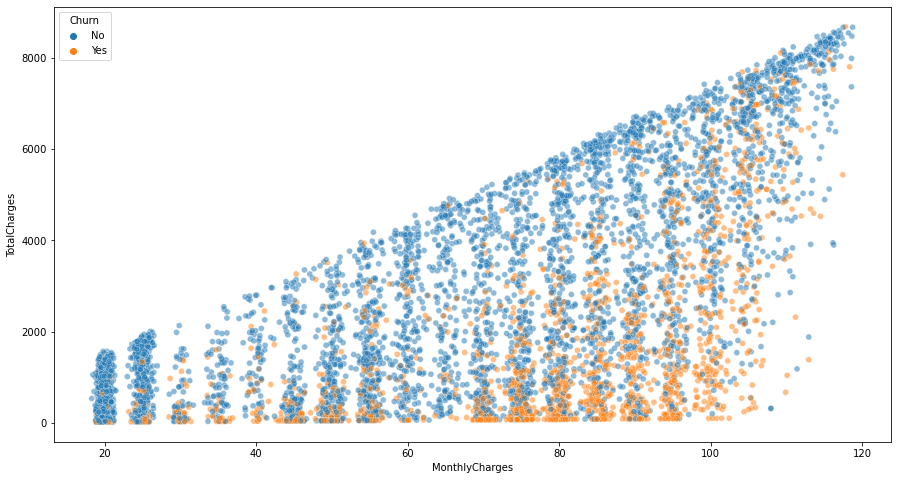

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5)

As expected people leaving tend to make us the least amount of total revenue, need to retain more

In [37]:
pd.set_option('display.max_rows',None)
churn_rate = df[df['Churn']=='Yes'].groupby(['tenure'])['Churn'].value_counts()/df.groupby(['tenure'])['Churn'].count() * 100
churn_rate

tenure  Churn
1       Yes      61.990212
2       Yes      51.680672
3       Yes      47.000000
4       Yes      47.159091
5       Yes      48.120301
6       Yes      36.363636
7       Yes      38.931298
8       Yes      34.146341
9       Yes      38.655462
10      Yes      38.793103
11      Yes      31.313131
12      Yes      32.478632
13      Yes      34.862385
14      Yes      31.578947
15      Yes      37.373737
16      Yes      35.000000
17      Yes      29.885057
18      Yes      24.742268
19      Yes      26.027397
20      Yes      25.352113
21      Yes      26.984127
22      Yes      30.000000
23      Yes      15.294118
24      Yes      24.468085
25      Yes      29.113924
26      Yes      18.987342
27      Yes      18.055556
28      Yes      21.052632
29      Yes      20.833333
30      Yes      22.222222
31      Yes      24.615385
32      Yes      27.536232
33      Yes      21.875000
34      Yes      18.461538
35      Yes      17.045455
36      Yes      20.000000
37      Yes   

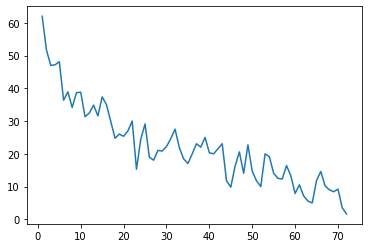

In [38]:
plt.plot(range(1,73),churn_rate.values)

As expected people tend to leave when they are new, longer term customers tend to leave less, need to target this group

In [40]:
# Group them in a smaller cohort for some easier visulizations
def cohort_group(tenure):
    if tenure < 12:
        return '0-12 Months'
    elif tenure < 24:
        return '12-24 Months'
    elif tenure < 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
    
df['Tenure Cohort'] = np.vectorize(cohort_group)(df['tenure'])
df[['tenure','Tenure Cohort']].head(20)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

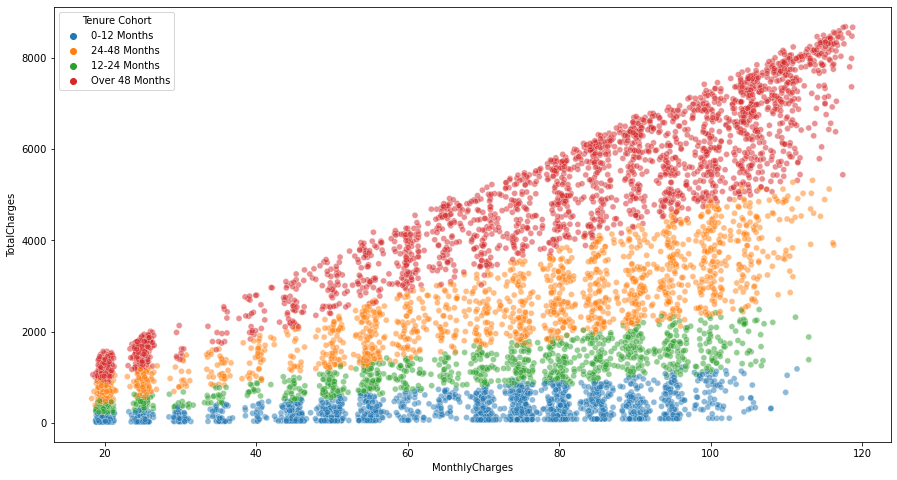

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.5)

Our end goal as seen here is keeping customers around longer so we can make more from them

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

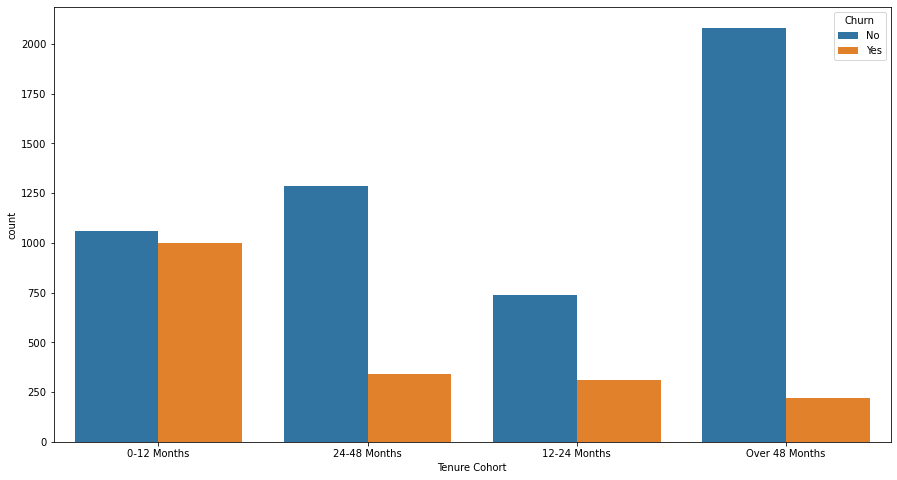

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

We can make the biggest difference wit people less than a year

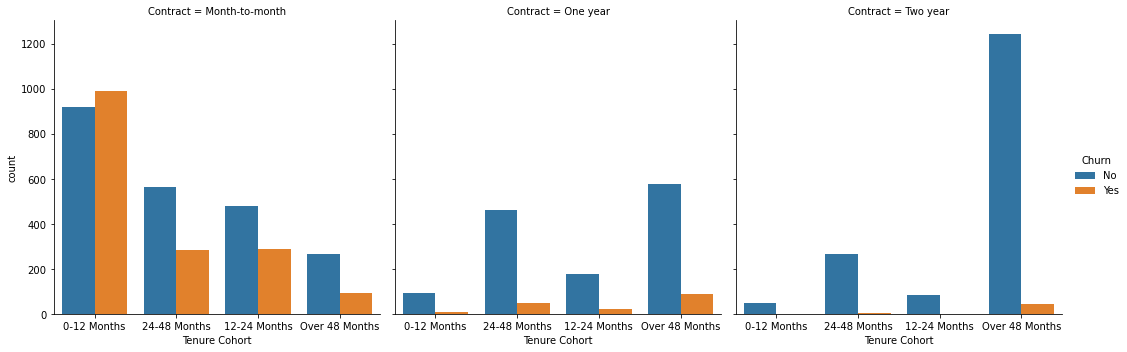

In [32]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

Seems like the month to month contracts are not very helpful to retaining customers

## Single Tree

In [74]:
X = df.drop(['Churn','Tenure Cohort','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

In [76]:
y= df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [78]:
mod_tree = DecisionTreeClassifier(random_state=101)

grid_param = {'max_features':['sqrt','log2']}
grid_cv = GridSearchCV(mod_tree,grid_param)

In [79]:
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_features': ['sqrt', 'log2']})

In [80]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_features='log2', random_state=101)

In [81]:
preds_tree = grid_cv.predict(X_test)
print(classification_report(y_test,preds_tree))

              precision    recall  f1-score   support

          No       0.86      0.82      0.84       557
         Yes       0.41      0.48      0.45       147

    accuracy                           0.75       704
   macro avg       0.63      0.65      0.64       704
weighted avg       0.76      0.75      0.76       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


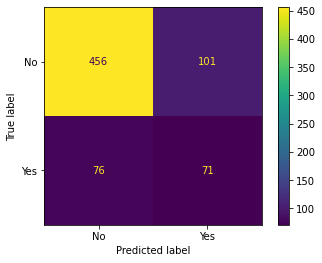

In [82]:
plot_confusion_matrix(grid_cv,X_test,y_test)

In [83]:
#modifying the basic tree a bit
mod_tree_1 = DecisionTreeClassifier(random_state=101,max_features='auto')
mod_tree_1.fit(X_train,y_train)
preds_tree_1 = mod_tree_1.predict(X_test)
print(classification_report(y_test,preds_tree))

              precision    recall  f1-score   support

          No       0.86      0.82      0.84       557
         Yes       0.41      0.48      0.45       147

    accuracy                           0.75       704
   macro avg       0.63      0.65      0.64       704
weighted avg       0.76      0.75      0.76       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Seem to be predicting better with people who dont leave with this basic tree approach

In [84]:
grid_cv.best_estimator_.feature_importances_

array([0.02191504, 0.1613075 , 0.16884685, 0.17576096, 0.02490848,
       0.01945104, 0.01703499, 0.00398361, 0.00406661, 0.01502957,
       0.0192176 , 0.        , 0.        , 0.02883878, 0.        ,
       0.02816152, 0.        , 0.0195807 , 0.        , 0.02375255,
       0.        , 0.01591368, 0.0541822 , 0.02003295, 0.03907537,
       0.02717913, 0.02916004, 0.01448897, 0.06175857, 0.00635329])

In [85]:
mod_tree_1_imp_features = pd.DataFrame(index=X.columns,data=grid_cv.best_estimator_.feature_importances_,columns=['Feature Importance'])
mod_tree_1_imp_features = mod_tree_1_imp_features.sort_values('Feature Importance')
mod_tree_1_imp_features

,Feature Importance
OnlineBackup_No internet service,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
InternetService_No,0.000000
PhoneService_Yes,0.003984
MultipleLines_No phone service,0.004067
PaymentMethod_Mailed check,0.006353
PaymentMethod_Credit card (automatic),0.014489


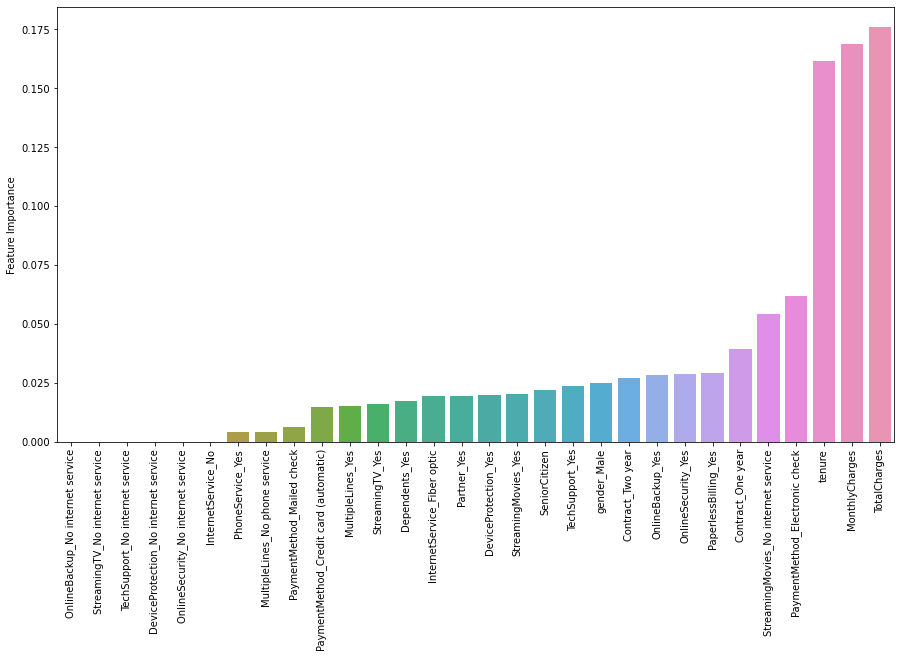

In [86]:
plt.figure(figsize=(15,8))
sns.barplot(data=mod_tree_1_imp_features,x=mod_tree_1_imp_features.index,y='Feature Importance')
plt.xticks(rotation=90);

Easier to visualize the feature importances in the above graph. As expected tenure, monthly and total charges are high predictors 

Try using a random forest tree, should be better than a singular tree without overfitting

In [88]:
forest = RandomForestClassifier()
forest_param = {'n_estimators':[25,50,100,200],
               'max_depth':[5,10,25],
               'max_features':['sqrt','log2'],
               'random_state':[101]}
grid_cv_forest = GridSearchCV(forest,forest_param)

In [89]:
grid_cv_forest.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 25],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 50, 100, 200],
                         'random_state': [101]})

In [93]:
grid_cv_forest.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 101}

In [94]:
preds_forest = grid_cv_forest.predict(X_test)
print(classification_report(y_test,preds_forest))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.58      0.48      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


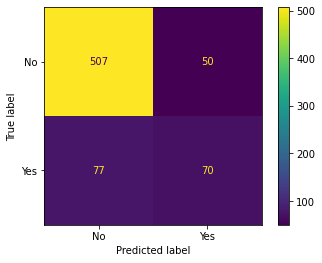

In [95]:
plot_confusion_matrix(grid_cv_forest,X_test,y_test)

As expected it fairs a bit better than the simple tree method before
Lets try using some boosted trees and see if it can improve further

In [96]:
ada_boost = AdaBoostClassifier(random_state=101)
ada_param = {'n_estimators':[25,50,75,100,200,400],
            'learning_rate':[0.01,0.1,0.2]}
grid_cv_ada = GridSearchCV(ada_boost,ada_param)

In [97]:
grid_cv_ada.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=101),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [25, 50, 75, 100, 200, 400]})

In [98]:
grid_cv_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [100]:
preds_ada = grid_cv_ada.predict(X_test)
print(classification_report(y_test,preds_ada))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       557
         Yes       0.64      0.49      0.55       147

    accuracy                           0.84       704
   macro avg       0.76      0.71      0.73       704
weighted avg       0.82      0.84      0.83       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


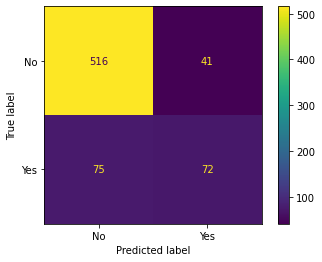

In [101]:
plot_confusion_matrix(grid_cv_ada,X_test,y_test)

Fares a bit better than the others.
Lets try some non tree methods for modelling but now we have to standardize the inputs since tree methods only check 1 feature at a time

In [102]:
## Check a linear model
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [103]:
from sklearn.linear_model import RidgeClassifier

In [104]:
model_ridge = RidgeClassifier()

In [105]:
model_ridge.fit(X_train_scaled,y_train)

RidgeClassifier()

In [106]:
pred_ridge = model_ridge.predict(X_test_scaled)

In [107]:
print(classification_report(y_test,pred_ridge))

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.47      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



Base case ridge model does ok, lets try tuning the parameters

C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


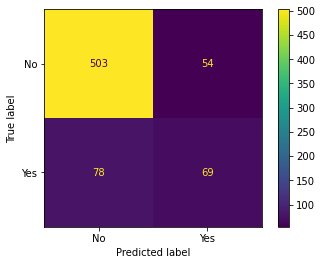

In [108]:
plot_confusion_matrix(model_ridge,X_test_scaled,y_test)

In [109]:
grid_ridge_param ={'alpha':[0,0.01,0.1,0.2,0.5,0.75,0.9,0.99]}
grid_ridge = GridSearchCV(model_ridge,grid_ridge_param)

In [110]:
grid_ridge.fit(X_train_scaled,y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0, 0.01, 0.1, 0.2, 0.5, 0.75, 0.9, 0.99]})

In [111]:
grid_ridge.best_params_

{'alpha': 0.99}

In [112]:
pred_grid_ridge = grid_ridge.predict(X_test_scaled)

In [113]:
print(classification_report(y_test,pred_grid_ridge))

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.47      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


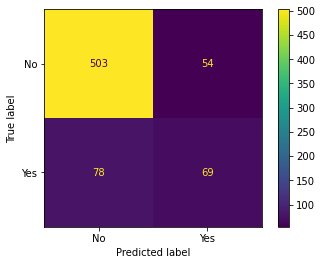

In [74]:
plot_confusion_matrix(grid_ridge,X_test_scaled,y_test)

Does not seem to fair much better than defaults.
Lets try using the support vector machines and see if we could do any better

In [114]:
from sklearn.svm import SVC

In [115]:
grid_svc_param = {'kernel':['linear','poly','rbf'],
           'degree':[2,3,5],
           'gamma':['scale','auto']}
svc = SVC()

grid_svc = GridSearchCV(svc,grid_svc_param)

In [116]:
grid_svc.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [2, 3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [117]:
grid_svc.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [118]:
preds_svc = grid_svc.predict(X_test_scaled)

In [119]:
print(classification_report(y_test,preds_svc))

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


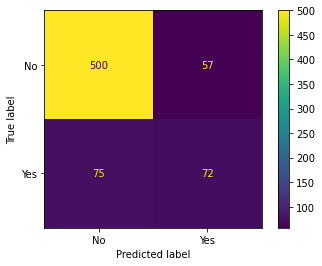

In [81]:
plot_confusion_matrix(grid_svc,X_test_scaled,y_test)

Ada boost was the best amongst the methods we choose.
Lets see if we can affect the results by changing the balance of the classes

In [137]:
## Try to balance the classes by oversampling and undersampling

In [124]:
print(f'Number of chuned',df[df['Churn']=='Yes']['Churn'].value_counts())
print(f'Number of chuned',df[df['Churn']=='No']['Churn'].value_counts())

Number of chuned Yes    1869
Name: Churn, dtype: int64
Number of chuned No    5163
Name: Churn, dtype: int64


In [125]:
from imblearn.over_sampling import RandomOverSampler

In [126]:
from imblearn.under_sampling import RandomUnderSampler

In [127]:
over_sampler =RandomOverSampler()
X_resamp, y_resamp = over_sampler.fit_resample(X_train,y_train)

In [133]:
print('No of yes samples',y_resamp[y_resamp=='Yes'].count())
print('No of no samples',y_resamp[y_resamp=='No'].count())

No of yes samples 4606
No of no samples 4606


In [128]:
ada_boost = AdaBoostClassifier(random_state=101)
ada_param = {'n_estimators':[25,50,75,100,200,400],
            'learning_rate':[0.001,0.01,0.1]}
grid_cv_ada = GridSearchCV(ada_boost,ada_param)

In [129]:
grid_cv_ada.fit(X_resamp,y_resamp)

GridSearchCV(estimator=AdaBoostClassifier(random_state=101),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [25, 50, 75, 100, 200, 400]})

In [130]:
preds_ada = grid_cv_ada.predict(X_test)
print(classification_report(y_test,preds_ada))

              precision    recall  f1-score   support

          No       0.92      0.72      0.81       557
         Yes       0.42      0.76      0.54       147

    accuracy                           0.73       704
   macro avg       0.67      0.74      0.67       704
weighted avg       0.82      0.73      0.75       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


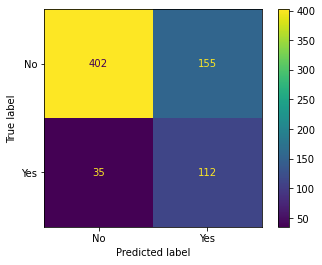

In [131]:
plot_confusion_matrix(grid_cv_ada,X_test,y_test)

In [135]:
under_sampler =RandomUnderSampler()
X_resamp_coarse, y_resamp_coarse = under_sampler.fit_resample(X_train,y_train)

In [138]:
print('No of yes samples',y_resamp_coarse[y_resamp_coarse=='Yes'].count())
print('No of no samples',y_resamp_coarse[y_resamp_coarse=='No'].count())

No of yes samples 1722
No of no samples 1722


In [139]:
grid_cv_ada.fit(X_resamp_coarse,y_resamp_coarse)

GridSearchCV(estimator=AdaBoostClassifier(random_state=101),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [25, 50, 75, 100, 200, 400]})

In [140]:
preds_ada = grid_cv_ada.predict(X_test)
print(classification_report(y_test,preds_ada))

              precision    recall  f1-score   support

          No       0.93      0.73      0.81       557
         Yes       0.43      0.79      0.56       147

    accuracy                           0.74       704
   macro avg       0.68      0.76      0.69       704
weighted avg       0.82      0.74      0.76       704



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


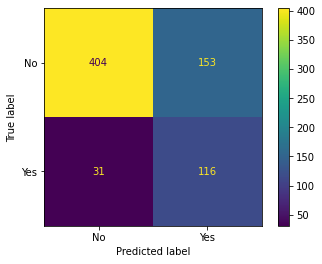

In [141]:
plot_confusion_matrix(grid_cv_ada,X_test,y_test)

Results seem to be a slightly better for the yes class when using the undersampler, even though we lost a bit from the no class

## Lets switch to some simple deep learning 

In [237]:
#Map the data to 0 or 1 for the deep learning predictions
deep_y_train = y_train.map({'No': 0, 'Yes': 1})
input_size = X_train.shape[1]
model=tf.keras.Sequential([tf.keras.layers.Dense(50,input_shape=(input_size,), activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
#                             tf.keras.layers.Dropout(0.1), 
                             tf.keras.layers.Dense(200, activation='relu'),
#                             tf.keras.layers.Dropout(0.1), 
#                             tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 256
max_epochs = 110

model.fit(X_train,
         deep_y_train,
         batch_size = batch_size,
         epochs=max_epochs,
         verbose=0)

In [238]:
dnn_pred = model.predict(X_test)
dnn_pred2= np.where(dnn_pred>0.5,'Yes','No')
print(classification_report(y_test,dnn_pred2))

22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

          No       0.85      0.94      0.90       557
         Yes       0.64      0.39      0.49       147

    accuracy                           0.83       704
   macro avg       0.75      0.67      0.69       704
weighted avg       0.81      0.83      0.81       704



In [241]:
## Lets use the oversampled data
#Map the data to 0 or 1 for the deep learning predictions
deep_y_train2 = y_resamp.map({'No': 0, 'Yes': 1})
input_size = X_resamp.shape[1]
model2=tf.keras.Sequential([tf.keras.layers.Dense(50,input_shape=(input_size,), activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
#                             tf.keras.layers.Dropout(0.1), 
                             tf.keras.layers.Dense(200, activation='relu'),
#                             tf.keras.layers.Dropout(0.1), 
#                             tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 256
max_epochs = 110

model2.fit(X_resamp,
         deep_y_train2,
         batch_size = batch_size,
         epochs=max_epochs,
         verbose=0)

In [242]:
dnn_pred = model2.predict(X_test)
dnn_pred2= np.where(dnn_pred>0.5,'Yes','No')
print(classification_report(y_test,dnn_pred2))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          No       0.92      0.74      0.82       557
         Yes       0.43      0.74      0.55       147

    accuracy                           0.74       704
   macro avg       0.67      0.74      0.68       704
weighted avg       0.81      0.74      0.76       704



The deep learning is working better when data classes are a bit more matched. However model is not trained long enough and with enough data.
So for the time being the ada boost is still the best model